*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

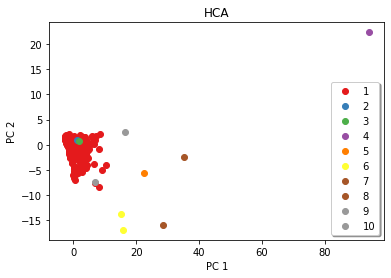

Jaccard Coefficient is  0.15824309696642858
Rand Index is  0.1882868355974245


In [1]:
import pandas as pd
import numpy as np 
from scipy.spatial import distance_matrix
from sklearn.decomposition import PCA
import matplotlib.cm as matpltlb
import matplotlib.pyplot as plot

def getInitCluster(cluster_list, point) :
    for index, cluster in enumerate(cluster_list) :
        if point in cluster :
            return index

df = pd.read_csv('/content/iyer.txt', header = None, sep ='\t') # Please change file name here
count = 10  # Please change cluster count here
groundTruth = df.iloc[:,1]
data = df.drop(columns = [0,1])
TP = FP = TN = FN = 0

col = []
for i in range(len(data.columns)) :
  col.append(i)
data.columns = col
data = np.array(data)
dataArr = np.matrix(data, dtype = float)
cluster_limit = len(dataArr)-count
eu_dist_matrix = distance_matrix(dataArr,dataArr)
cluster_label = []
for datapoint in range(len(dataArr)) :
  arr = []
  arr.append(datapoint)
  cluster_label.append(arr)

clusters_alloc = []
for i in range(cluster_limit):
    min_value = np.min(eu_dist_matrix[np.nonzero(eu_dist_matrix)])
    index1 = np.where(eu_dist_matrix == min_value)[0][0]
    index2 = np.where(eu_dist_matrix == min_value)[1][0]
    x_cluster = getInitCluster(cluster_label, index1)
    y_cluster = getInitCluster(cluster_label, index2)
    cluster_label[x_cluster] = cluster_label[x_cluster] + cluster_label[y_cluster]
    cluster_label.pop(y_cluster)
    for j in range(len(dataArr)) :
        eu_dist_matrix[index1][j] = min(eu_dist_matrix[index1][j], eu_dist_matrix[index2][j])
        eu_dist_matrix[j][index1] = min(eu_dist_matrix[j][index1], eu_dist_matrix[j][index2])
        eu_dist_matrix[index2][j] = 0
        eu_dist_matrix[j][index2] = 0
        eu_dist_matrix[j][j] = 0

clusters_alloc = np.zeros(len(dataArr))
cluster_name = 1;

for cluster in cluster_label:
    for c in cluster:
        clusters_alloc[c] = cluster_name
    cluster_name = cluster_name + 1

pca_plot_matrix = PCA(n_components = 2).fit_transform(dataArr)
labels = set(clusters_alloc)
list_labels = list(labels)
unique_naming_list_1 = []
colours_unique_vector = matpltlb.Set1(np.linspace(0, 1, len(list_labels)))

for i in range(len(list_labels)):
    dis_rows_index = np.where(clusters_alloc == list_labels[i])
    dis_rows = pca_plot_matrix[dis_rows_index]
    x_plot = [dis_rows[:,0]]
    y_plot = [dis_rows[:,1]]
    unique_naming_list_1.append(plot.scatter(x_plot, y_plot, c = colours_unique_vector[i]))

list_labels = [-1.0 if x == 0 else x for x in list_labels]
list_labels = np.array(list_labels, dtype = int)
plot.title("HCA")
plot.legend(unique_naming_list_1, list_labels, loc = "best", ncol = 1, markerfirst = True, shadow = True)
plot.xlabel("PC 1")
plot.ylabel("PC 2")
plot.show()

for i in range(len(data)) :
    for j in range(len(data)) :
        if groundTruth[i] != groundTruth[j] :
            if clusters_alloc[i] == clusters_alloc[j] :
                FP = FP + 1
            else :
                TN = TN + 1                
        else :
            if clusters_alloc[i] != clusters_alloc[j] :
                FN = FN + 1
            else :
                TP = TP + 1

RandIndex = (TP + TN)/ (TP + TN + FP + FN)
JaccardCoeff = (TP)/ (TP + FP + FN)
print("Jaccard Coefficient is ", JaccardCoeff)
print("Rand Index is ", RandIndex)
